<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 10th exercise: <font color="#C70039">Interpretable Machine Learning by means of Shapley Values</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   21.12.2025
* Student: Tim Voßmerbäumer
* Matr.Nr.: 11474232

---------------------------------

<img src="https://shap.readthedocs.io/en/latest/_images/example_notebooks_overviews_An_introduction_to_explainable_AI_with_Shapley_values_13_0.png" style="float: center;" width="600">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too.
* This applies to all exercises throughout this course.

---------------------------------

### <font color="ce33ff">DESCRIPTION</font>:

Before using Shapley values to explain complicated models, it is helpful to understand how they work for simple models.

In this respect the example in this notebook computes a model for the abalone data set (downloaded from UCI) and uses its outputs for explanation of feature importance using the SHAP explainer. In addition, several different visualization techniques (plots) for Shapley values are going to be demonstrated. 

For a description of the features please refer to <a href="https://archive.ics.uci.edu/dataset/1/abalone">UCI abalone data set</a>.

---------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. Develop a CNN for image classification and adapt the Shapley Value idea to that model. Comment your entire code.  

## Imports
Import all necessary utilities.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

## Load dataset

In [5]:
data = pd.read_csv("./data/abalone/abalone.data", names=["sex","length","diameter","height", 
                                                         "whole weight","shucked weight", "viscera weight","shell weight","rings"])
                         
#Get features
y = data['rings']
X = data[["sex","length","height","shucked weight","viscera weight","shell weight"]]

In [6]:
# do some necessary preprocessing
X.loc[X['sex'] == 'M', 'sex.M'] = 1
X.loc[X['sex'] == 'F', 'sex.F'] = 1
X.loc[X['sex'] == 'I', 'sex.I'] = 1

X = X.drop('sex', axis=1)

C:\Users\tvossmerbaeumer_scal\AppData\Local\Temp\ipykernel_10248\679909434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X['sex'] == 'M', 'sex.M'] = 1
C:\Users\tvossmerbaeumer_scal\AppData\Local\Temp\ipykernel_10248\679909434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X['sex'] == 'F', 'sex.F'] = 1


### Build a simple ML model and fit it.

In [7]:
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

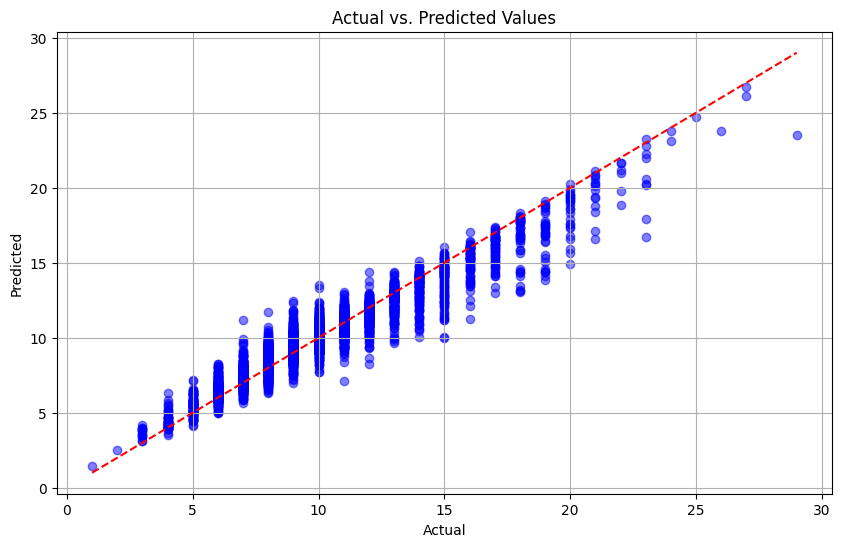

In [8]:
# Make predictions on the test set
y_pred = model.predict(X)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")

# Plot the diagonal line for reference
max_val = max(np.max(y), np.max(y_pred))
min_val = min(np.min(y), np.min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='dashed')

plt.grid(True)
plt.show()

### <font color=red>NOTE:</font>

Even though we did not put much love into our model, the results are quite ok. However, please keep in mind, that you should start computing Shapley value if and only if you have optimized your model. You do not have to be a genius to understand that the better the model, the better the Shapley values. 

### Now, compute the Shaley values

These are the two essential lines of code. Pass your model into the SHAP Explainer function. 
This creates an explainer object. Then, use this to calculate SHAP values for every observation in the feature matrix.

In [9]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

----------------------------------------------
### Visualization section
----------------------------------------------

#### Waterfall plot for first observation

There are 8 Shapley values for each of the 4177 observations in the feature matrix. 
That is one Shapley value for each feature in your model. You can use the waterfall function to visualise the Shapley values of the first observation.

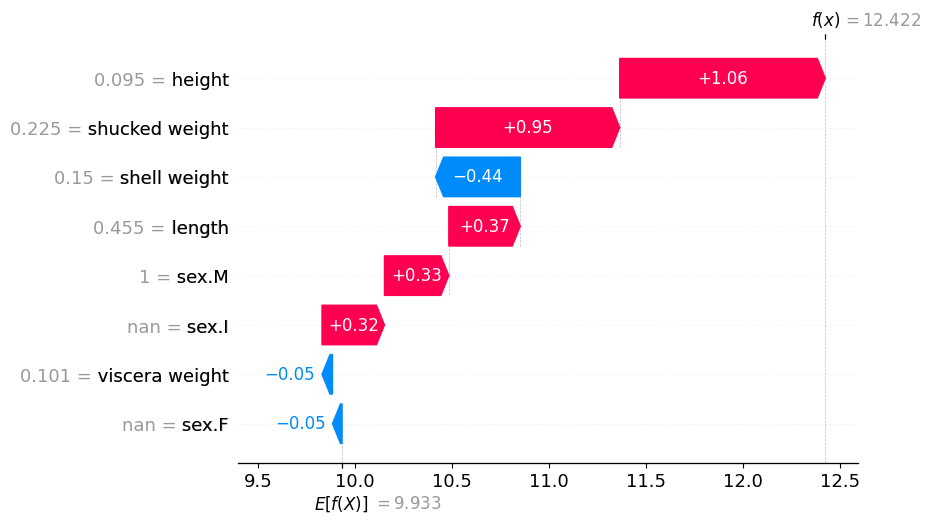

In [10]:
shap.plots.waterfall(shap_values[0])

##### <font color="ce33ff">Interpretation:</font>

**E[f(x)] = 9.933** gives the average predicted number of rings across all 4177 abalones. 
**f(x) = 13.043** is the predicted number of rings for this particular abalone. 
The Shapley values are all the values in between. 
For example, the shucked weight contributes to the total predicted number by an increase of **1.68**.

There is a unique waterfall plot for every observation of an abalone in your dataset. They can all be interpreted in the same way as above. In each case, the Shapley values tell us how the features have contributed to the prediction when compared to the average prediction. Large positive/negative values indicate that the feature had a significant impact on the model’s prediction.

#### Forceplot for first observation

In [11]:
shap.plots.force(shap_values[0])

##### <font color="ce33ff">Interpretation:</font>

Another way to visualise these individual feature contributions is using a so-called force plot. 
Think of it as a condensed waterfall plot. It starts at the same base value of **9.933** and you can see how each feature has contributed to the final prediction of **13.04**.

#### Entire/Stacked force plot

Waterfall and force plots are great for interpreting individual predictions (see above). To understand how your model makes predictions in general you need to aggregate the Shapley values. One way to do this is by using the so-called stacked-force plot.

You can combine multiple force plots together to create a stacked force plot. In this example pass the Shapley values for the first 100 observations in the force plot function. Each individual force plot is now vertical and stacked side by side.

Since this plot is interactive, you can change the ordering of the plots and choose which feature contributions to display.

In [12]:
shap.plots.force(shap_values[0:100])

##### <font color="ce33ff">Interpretation:</font>

For example, select "shell weight" on x-axis and "shell weight effects" on the y-axis.
Now, from the appearing plot you can see that as shell weight increases the Shapley values also increase. 
Since this is a function of age, older abalones tend to have heavier shells.

This is one way to understand the nature of the relationships captured by the model. 
Now, you will learn that the so-called beeswarm plot and dependence plots can also be used this way.

#### Mean SHAPLEY values

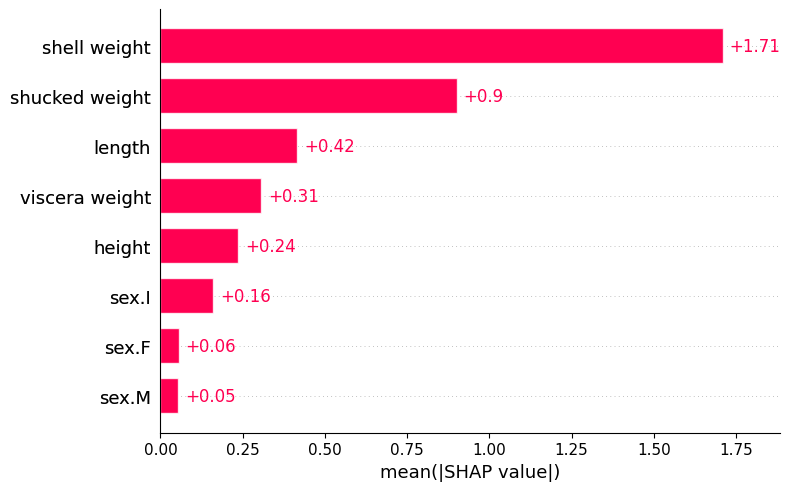

In [13]:
shap.plots.bar(shap_values)

##### <font color="ce33ff">Interpretation:</font>
This bar plot tells you which features are most important. 
For each and every feature, it calculates the mean Shapley value across all observations. 

Specifically, it takes the mean of the absolute values as it does not want positive and negative values to offset each other. 
There is one bar for each feature in the data set. You can easily see, that "shell weight" has the largest mean Shapley value.

Features that have made large positive/negative contributions will show a large mean Shapley value. In other words, these are the features that have had a significant impact on the model’s predictions. Hence, this bar plot can be used in the same manner as a feature importance plot.

#### Beeswarm plot

The so-called beeswarm plot is one of the most useful plots. The beeswarm visualises all of the SHAP values. 
On the y-axis, the values are grouped by feature. For each group, the colour of the points is determined by the feature value (i.e. higher feature values are more red - see legend ).

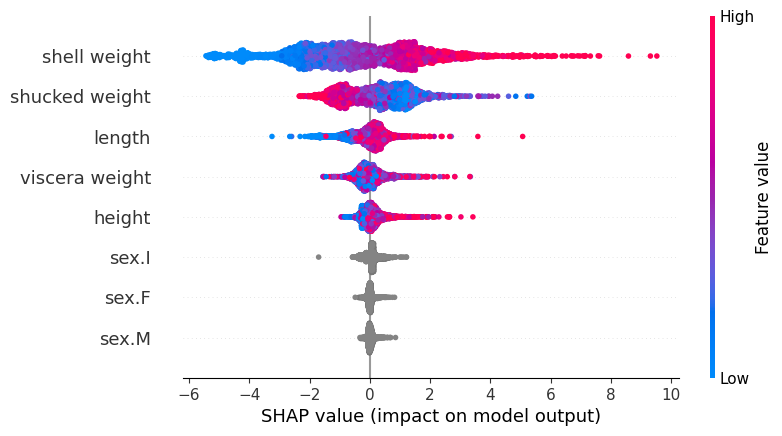

In [14]:
shap.plots.beeswarm(shap_values)

##### <font color="ce33ff">Interpretation:</font>

The features in the above plot are ordered by mean SHAP value.

E.g., for "shell weight", you will notice, that SHAP values increase when the feature value increases. 
Remember, you saw a similar relationship in the stacked force plot. It tells you that larger values for "shell weight" will lead to a higher predicted number of label value "rings".

You may also notice, that the feature "shucked weight" shows the opposite relationship. 
Looking at the beeswarm plot, we can see that larger values for this feature are associated with smaller SHAP values. 

##### Heatmap

Passing the matrix of 200 Shapley values to the heatmap plot function creates a plot with the instances on the x-axis, the model features on the y-axis, and the Shapley values encoded on a color scale. By default, the samples are ordered based on a hierarchical clustering by their explanation similarity. 
This results in samples that have the same model output for the same reason getting grouped together.

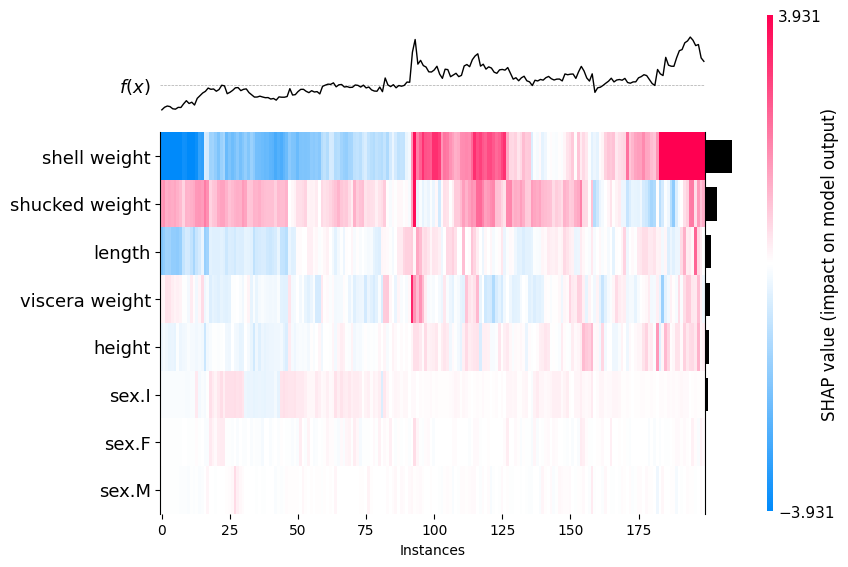

<Axes: xlabel='Instances'>

In [15]:
shap.plots.heatmap(shap_values[:200])

##### <font color="ce33ff">Interpretation:</font>

The output of the model is shown above the heatmap matrix (centered around the explaination’s average value), and the global importance of each feature shown as a bar plot on the right hand side of the plot (by default this is the average measure of overall importance).

#### Dependence plots of the Shapley values 

A dependence plot is a scatter plot of the Shapley value vs. the feature value for one single feature. 
They are particularly useful if the feature has got a non-linear relationship with the label.

##### Plot 1: shell weight

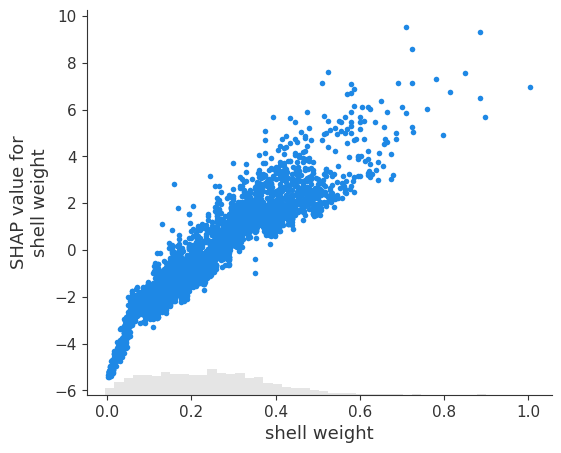

In [16]:
shap.plots.scatter(shap_values[:,"shell weight"])

##### <font color="ce33ff">Interpretation:</font>

For example, take the dependence plot for "shell weight" feature. 
Looking at the beeswarm plot we may have assumed that the Shapley values increase linearly with the feature value. 
However, this dependency plot shows you that the relationship is not perfectly linear. That is very useful.

##### Plot 2: shucked weight

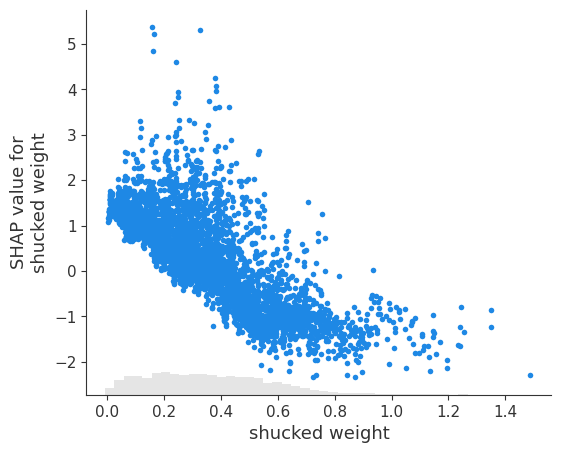

In [17]:
shap.plots.scatter(shap_values[:,"shucked weight"])

##### <font color="ce33ff">Interpretation:</font>
The dependency plot for "shucked weight" (i.e the weight of the abalone meat). 
Using this plot you can see and confirm the relationship you saw in the beeswarm plot already. 
The SHAP values do decrease as shucked weight increases.

##### Plot 3: shell weight & shucked weight

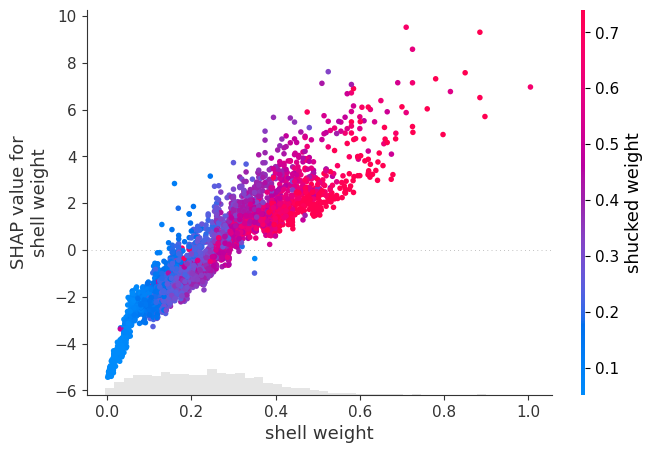

In [18]:
shap.plots.scatter(shap_values[:,"shell weight"],
                   color=shap_values[:,"shucked weight"])

##### <font color="ce33ff">Interpretation:</font>
This plot can be used to visualise interactions between features. BUT be cautious! 
In your case, the plot is a result of the correlation between the two features.

Intuitively, this relationship seems strange. 

Wouldn’t you expect an older abalone to be larger and having more meat? 

This is, in fact, a result of an interaction between "shell weight" and "shucked weight". 
You could not see it in the dependence plot due to the correlation. 

## Task 4: CNN for Image Classification and Shapley Values

c:\Users\tvossmerbaeumer_scal\Documents\Uni-work\AML\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


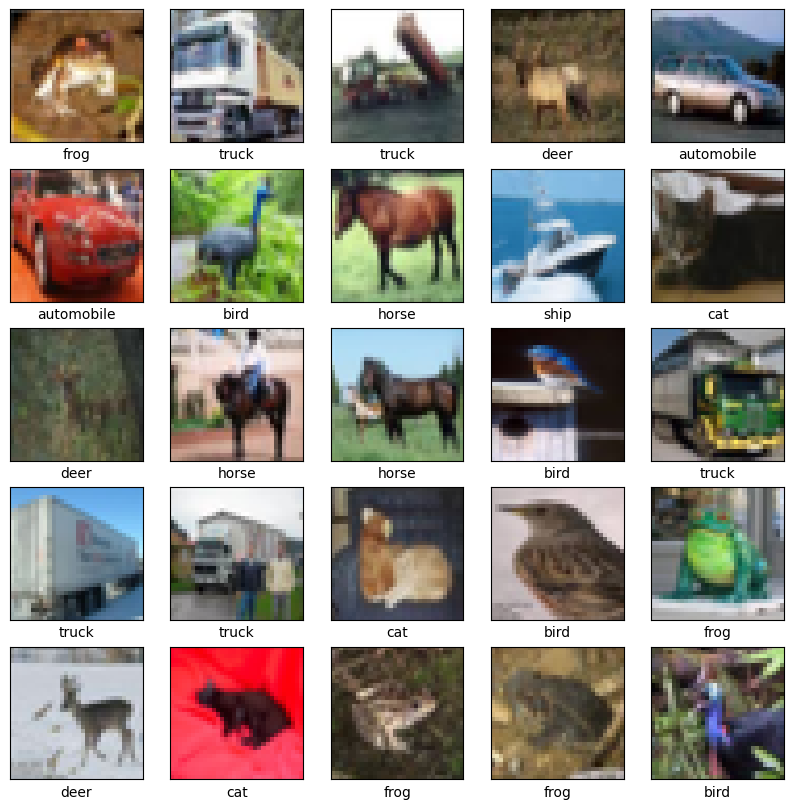

In [ ]:
from PIL import Image
import os

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display some of the training images to understand the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



### Build and Train the CNN Model

Here, we define a simple Convolutional Neural Network architecture.


c:\Users\tvossmerbaeumer_scal\Documents\Uni-work\AML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4345 - loss: 1.5484 - val_accuracy: 0.5407 - val_loss: 1.2947
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5807 - loss: 1.1759 - val_accuracy: 0.5892 - val_loss: 1.1590
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6383 - loss: 1.0231 - val_accuracy: 0.6385 - val_loss: 1.0268
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6775 - loss: 0.9227 - val_accuracy: 0.6773 - val_loss: 0.9207
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7005 - loss: 0.8592 - val_accuracy: 0.6871 - val_loss: 0.8931
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7198 - loss: 0.8032 - val_accuracy: 0.6926 - val_loss: 0.8878
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7362 - loss: 0.7537 - val_accuracy: 0.7051 - val_loss: 0.8543
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7513 - loss: 0

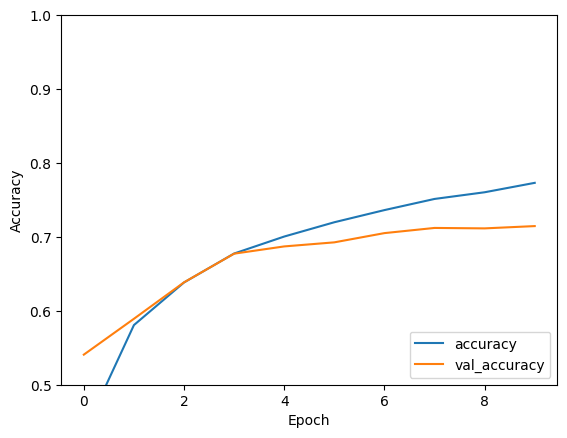

313/313 - 2s - 5ms/step - accuracy: 0.7146 - loss: 0.8405

Test accuracy: 0.7146000266075134


In [ ]:
# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")



### Adapt Shapley Values to the CNN Model

To apply Shapley values to a CNN model, we'll use shap.DeepExplainer. This explainer is specifically designed for deep learning models like CNNs. 


Explaining image 1/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
True Label: cat, Predicted Label: cat (Probability: 0.96)


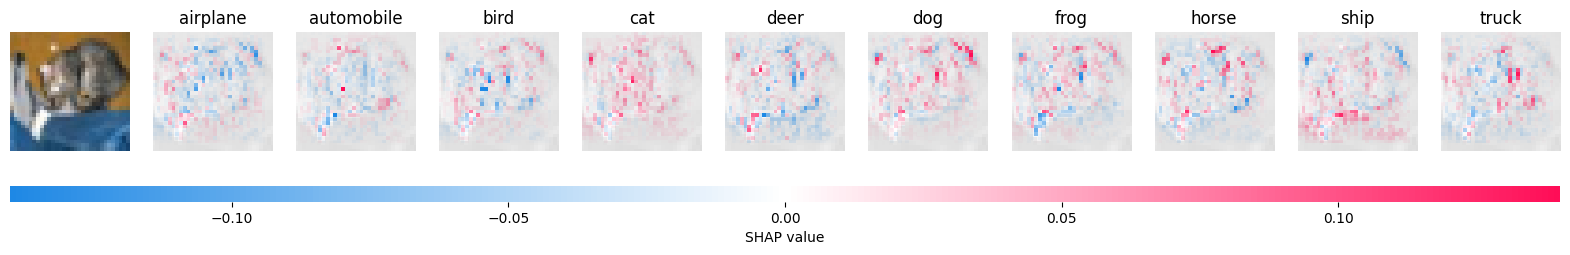

Explaining image 2/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
True Label: ship, Predicted Label: ship (Probability: 0.95)


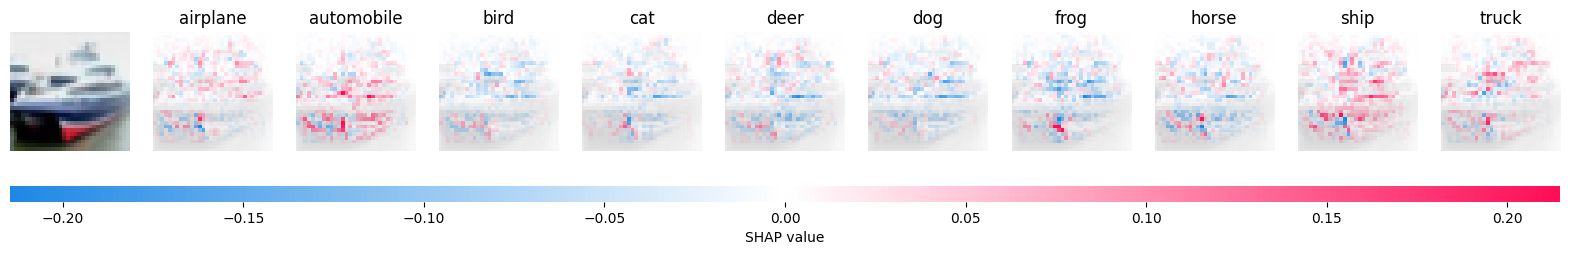

Explaining image 3/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
True Label: ship, Predicted Label: ship (Probability: 0.61)


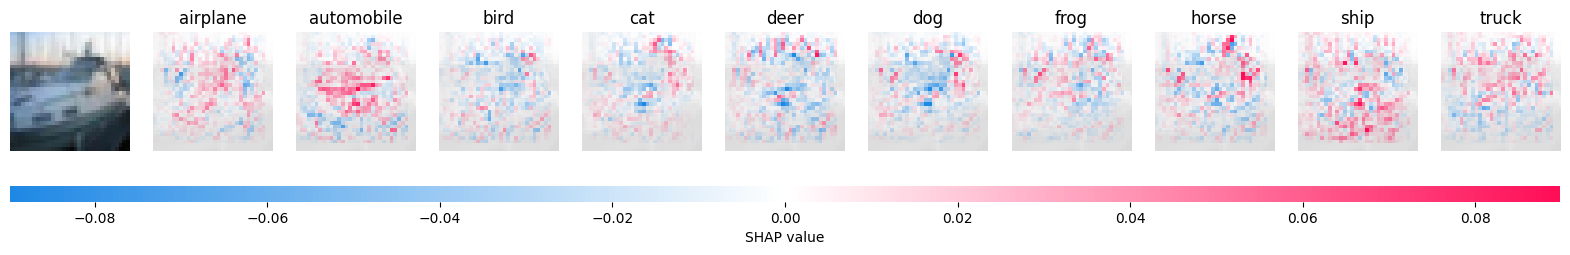

Explaining image 4/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
True Label: airplane, Predicted Label: airplane (Probability: 0.88)


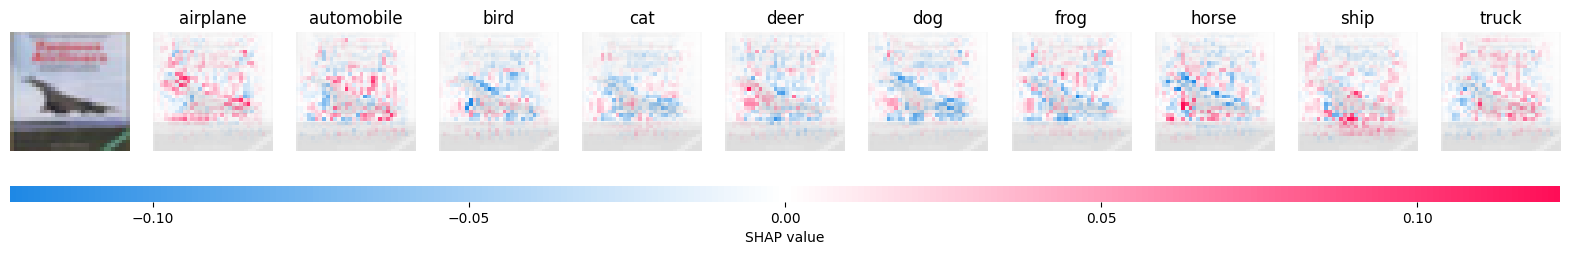

Explaining image 5/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
True Label: frog, Predicted Label: frog (Probability: 0.74)


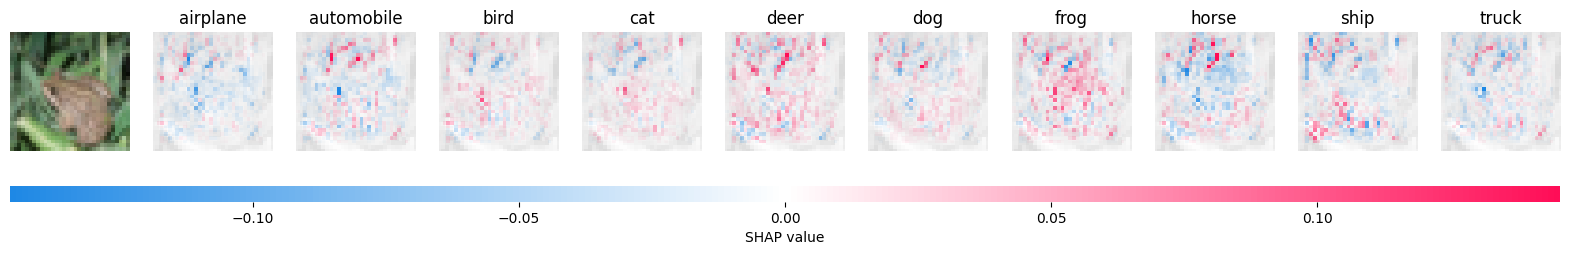

Explaining image 6/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
True Label: frog, Predicted Label: frog (Probability: 0.99)


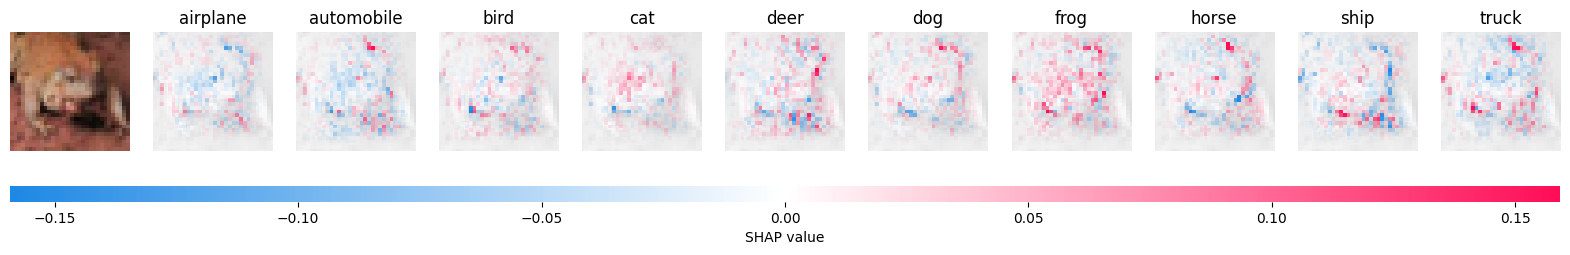

Explaining image 7/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
True Label: automobile, Predicted Label: automobile (Probability: 0.84)


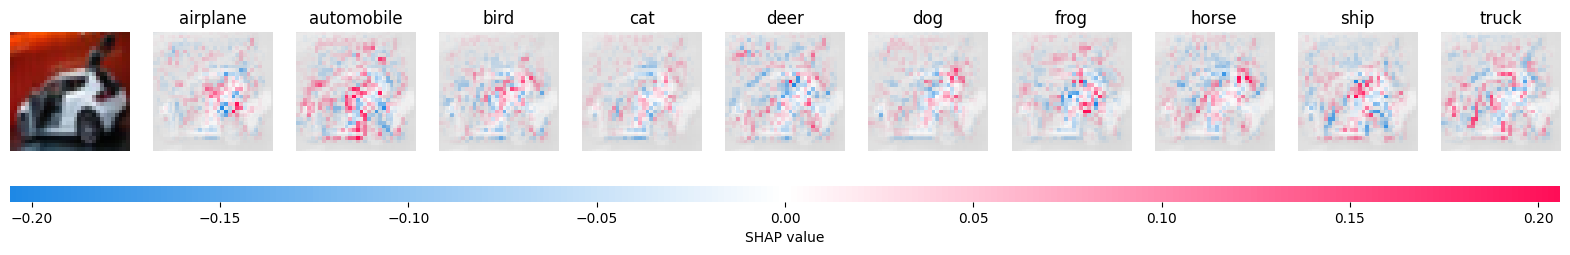

Explaining image 8/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
True Label: frog, Predicted Label: frog (Probability: 0.85)


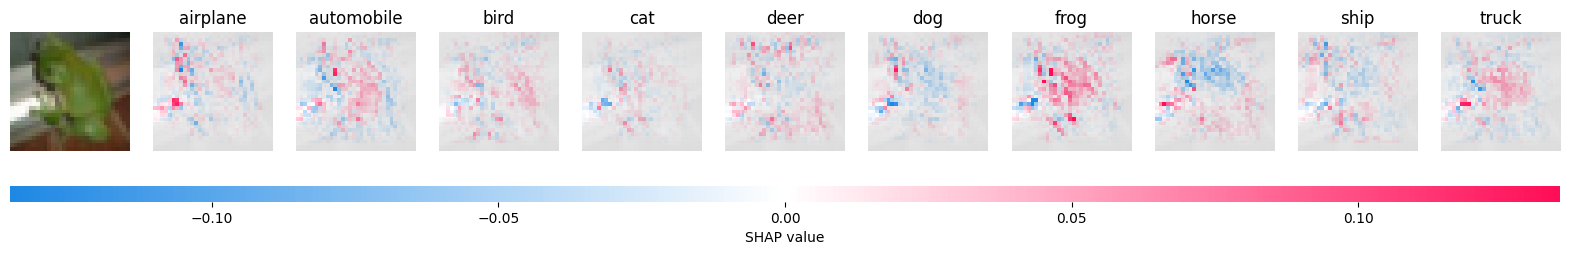

Explaining image 9/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
True Label: cat, Predicted Label: cat (Probability: 0.77)


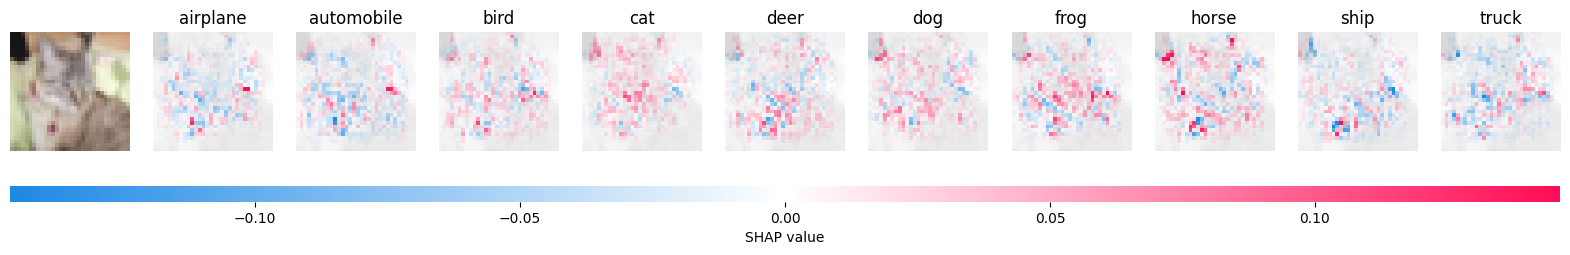

Explaining image 10/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
True Label: automobile, Predicted Label: automobile (Probability: 0.80)


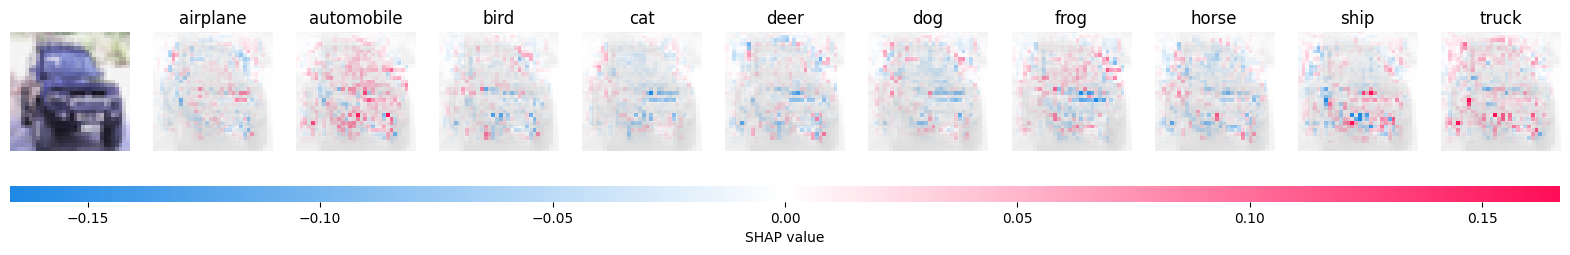

Explaining image 11/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
True Label: airplane, Predicted Label: deer (Probability: 0.66)


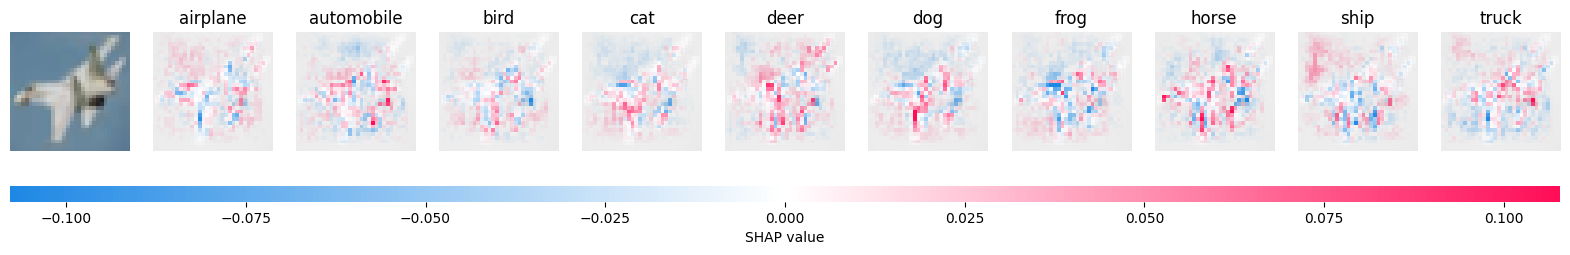

In [32]:
# Select a subset of test images for explanation.
background = train_images[np.random.choice(train_images.shape[0], 100, replace=False)]
e_deep = shap.DeepExplainer(model, background)

# Define the number of images from the test set to explain
num_explain_images = 11
explain_images = test_images[0:num_explain_images]

# Compute SHAP values for the selected images.
shap_values_deep = e_deep.shap_values(explain_images)

# Plot the SHAP values for each image.
# This visualization shows the positive and negative contributions of each pixel to the prediction.
for i in range(len(shap_values_deep)):
    print(f"Explaining image {i+1}/{len(shap_values_deep)}")
    
    # Get the true label and the model's predicted label for the current image.
    true_label = class_names[test_labels[i][0]]
    probabilities = tf.nn.softmax(model.predict(np.expand_dims(explain_images[i], axis=0)))[0]
    predicted_label_idx = np.argmax(probabilities)
    predicted_label = class_names[predicted_label_idx]
    
    print(f"True Label: {true_label}, Predicted Label: {predicted_label} (Probability: {probabilities[predicted_label_idx]:.2f})")
    
    # Display the image and its SHAP explanations.
    shap_values_for_image_i = [shap_values_deep[i][:, :, :, k] for k in range(len(class_names))]
    
    shap.image_plot(shap_values_for_image_i, explain_images[i], labels=class_names)





## Conclusion

Based on the Shapley value plots generated for the 11 images, it appears the shap.DeepExplainer is generally working effectively to highlight crucial regions of the input images that contribute to the CNN's classifications.

For correctly predicted images, the plots visibly emphasize the relevant features of the object being classified, for example: the body of an automobile for an "automobile" prediction, or the wings for an "airplane" prediction.